In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('../artifacts/useful datasets/dataset_vect.csv')

In [3]:
X = dataset.drop(['review', 'target'], axis=1)
y = dataset['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, shuffle=True, test_size=0.5)

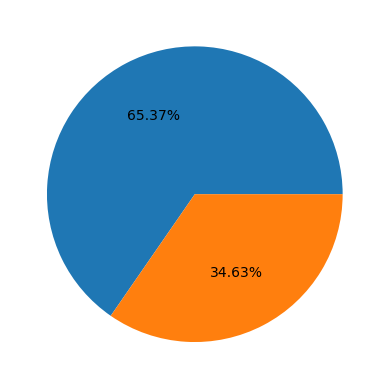

In [6]:
plt.pie(y_train.value_counts(), autopct='%1.2f%%')
plt.show()

In [11]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

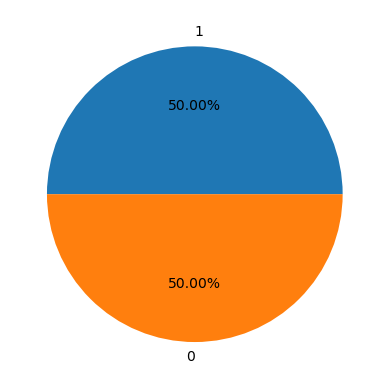

In [15]:
plt.pie(y_train_smote.value_counts() , labels = y_train_smote.value_counts().index, autopct='%1.2f%%')
plt.show()

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(300,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [49]:
model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
         epochs=5)

Epoch 1/5
2543/2543 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8344 - loss: 0.3877 - val_accuracy: 0.8681 - val_loss: 0.3092
Epoch 2/5
2543/2543 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8641 - loss: 0.3103 - val_accuracy: 0.8610 - val_loss: 0.3134
Epoch 3/5
2543/2543 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8679 - loss: 0.3028 - val_accuracy: 0.8621 - val_loss: 0.3136
Epoch 4/5
2543/2543 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8735 - loss: 0.2938 - val_accuracy: 0.8689 - val_loss: 0.3019
Epoch 5/5
2543/2543 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8747 - loss: 0.2912 - val_accuracy: 0.8696 - val_loss: 0.2986


In [50]:
y_pred = model.predict(X_test)

848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [51]:
y_pred_am = []
for i in y_pred:
    y_pred_am.append(np.argmax(i))


In [52]:
accuracy_score(y_pred_am, y_test)

0.8716861472659563

In [53]:
model.save('../artifacts/models/nn_model.h5')